Exact integral: 0.6666666666666669
N = 2: Simpson's approximation = 0.6380711874576984
N = 4: Simpson's approximation = 0.6565262647925708
N = 6: Simpson's approximation = 0.6611443168631917
N = 8: Simpson's approximation = 0.6630792800850236
N = 10: Simpson's approximation = 0.6640995897574211
N = 12: Simpson's approximation = 0.6647137679778873
N = 14: Simpson's approximation = 0.665116899000748
N = 16: Simpson's approximation = 0.6653981886281528
N = 18: Simpson's approximation = 0.665603608747738
N = 20: Simpson's approximation = 0.6657590079999167
N = 22: Simpson's approximation = 0.6658799201180278
N = 24: Simpson's approximation = 0.6659761837129695
N = 26: Simpson's approximation = 0.6660543014471288
N = 28: Simpson's approximation = 0.6661187253657622
N = 30: Simpson's approximation = 0.6661725953677093
N = 32: Simpson's approximation = 0.6662181827461797
N = 34: Simpson's approximation = 0.6662571668243104
N = 36: Simpson's approximation = 0.6662908131802284
N = 38: Simpson's

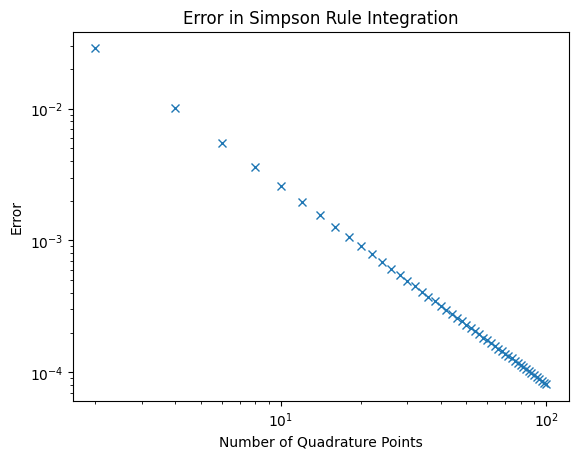

Convergence order: 1.4996414917813823


In [20]:
def simpson(func, a, b, N):
    """
    Numerical quadrature based on Simpson's rule.
    
    Parameters:
    func : function
        The function to integrate, handle to y = f(x).
    a : float
        The lower bound of the integration interval.
    b : float
        The upper bound of the integration interval.
    N : int
        The number of subintervals (N must be even).
    """
    from numpy import linspace, sum
    
    # Ensure that N is even
    if N % 2:
        raise ValueError("N must be even for Simpson's rule.")
    
    # Quadrature nodes
    x = linspace(a, b, N + 1)
    h = (b - a) / N
    
    # Simpson's rule calculation
    I = (func(x[0]) + func(x[-1]) +
         4 * sum(func(x[1:-1:2])) +
         2 * sum(func(x[2:-2:2]))) * h / 3.0
    
    return I

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from scipy import integrate
    from numpy import array, linspace, size, log, polyfit
    import numpy as np
    
    # Define a function and an interval
    #f = lambda x: 1 / (1 + (5 * x) ** 2)
    #left = 0.0
    #right = 1.0
    # Define a function and an interval
    #f = lambda x : 1./( 1+( 5 * x ) **2)
    #left = 0.0 ; right = 1.0
    f = lambda x : x**(1/2)
    left = 0.0 ; right = 1.0

    # Exact integration with scipy.integrate.quad
    exact, e = integrate.quad(f, left, right)
    print(f"Exact integral: {exact}")

    # Simpson's rule for different number of quadrature points
    N = linspace(2, 100, 50)  # Ensure N is even
    res = array([simpson(f, left, right, int(n)) for n in N])
    err = abs(res - exact)

    # Print the Simpson's approximations
    for n, approximation in zip(N, res):
        print(f"N = {int(n)}: Simpson's approximation = {approximation}")

    # Plotting error vs. number of quadrature points
    plt.loglog(N , err, 'x')
    plt.xlabel('Number of Quadrature Points')
    plt.ylabel('Error')
    plt.title('Error in Simpson Rule Integration')
    plt.show()

    # Linear fit to determine convergence order
    p = polyfit(log(N), log(err), 1)
    
    # Output the convergence order
    print("Convergence order:", -p[0])